In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def filepath_to_csv(filepath):
    csv_df = pd.read_csv(filepath)
    column_names = csv_df.columns[0].split(";")
    title_col = csv_df.columns[0]
    
    data_lists = []
    for column in column_names:
        data_lists.append([])

    for i in range(len(csv_df)):
        data_row = csv_df.iloc[i][title_col].split(";")
        for j in range(len(data_row)):
            data_lists[j].append(data_row[j])

    csv_dict = {}
    for j in range(len(data_row)):
        csv_dict[column_names[j]] = data_lists[j]

    df = pd.DataFrame(csv_dict)

    df['day'] = df['day'].astype(int)
    df['timestamp'] = df['timestamp'].astype(int)
    df['product'] = df['product'].astype(str)

    for i in range(3):
        ask_price_str = "ask_price_" + str(i+1)
        ask_volume_str = "ask_volume_" + str(i+1)
        bid_price_str = "bid_price_" + str(i+1)
        bid_volume_str = "bid_volume_" + str(i+1)

        df[ask_price_str] = df[ask_price_str].replace("", np.nan).astype(float)
        df[ask_volume_str] = df[ask_volume_str].replace("", 0).astype(int)
        df[bid_price_str] = df[bid_price_str].replace("", np.nan).astype(float)
        df[bid_volume_str] = df[bid_volume_str].replace("", 0).astype(int)

    df["mid_price"] = df["mid_price"].replace("", np.nan).astype(float)
    df["profit_and_loss"] = df["profit_and_loss"].replace("", np.nan).astype(float)

    return df

filepaths = [
    "prices_round_1_day_-2.csv",
    "prices_round_1_day_-1.csv",
    "prices_round_1_day_0.csv",
]

dfs = []
for filepath in filepaths:
    df = filepath_to_csv(filepath)
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df['total_time'] = (df['day'] + 2)* 999901 + df['timestamp']
df.drop(['timestamp'], axis=1, inplace=True)
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,total_time
0,-2,AMETHYSTS,9996.0,1,9995.0,25,NaN,0,10004.0,1,10005.0,25,NaN,0,10000.0,0.0,0
1,-2,STARFRUIT,4997.0,26,NaN,0,NaN,0,5003.0,26,NaN,0,NaN,0,5000.0,0.0,0
2,-2,AMETHYSTS,10000.0,5,9995.0,20,NaN,0,10005.0,20,NaN,0,NaN,0,10002.5,0.0,100
3,-2,STARFRUIT,5000.0,5,4998.0,6,4997.0,20,5004.0,20,NaN,0,NaN,0,5002.0,0.0,100
4,-2,STARFRUIT,4997.0,1,4996.0,30,NaN,0,5003.0,31,NaN,0,NaN,0,5000.0,0.0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,STARFRUIT,5053.0,1,5048.0,26,NaN,0,5054.0,2,5055.0,24,NaN,0,5053.5,0.0,2999502
59996,0,STARFRUIT,5047.0,27,NaN,0,NaN,0,5052.0,1,5054.0,27,NaN,0,5049.5,0.0,2999602
59997,0,AMETHYSTS,9995.0,27,NaN,0,NaN,0,10005.0,27,NaN,0,NaN,0,10000.0,0.0,2999602
59998,0,STARFRUIT,5048.0,2,5047.0,21,NaN,0,5054.0,23,NaN,0,NaN,0,5051.0,0.0,2999702


<Axes: >

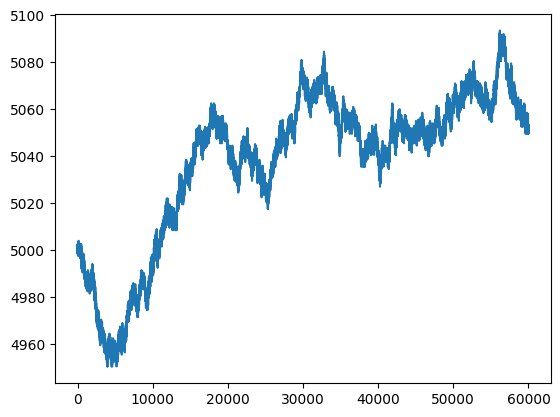

In [4]:
df[df['product'] == 'STARFRUIT'].mid_price.plot()

In [14]:
filepaths = [
    r"C:\Users\jiaha\Desktop\Projects\IMC Prosperity\island-data-bottle-round-5\prices_round_1_day_-2.csv",
    r"C:\Users\jiaha\Desktop\Projects\IMC Prosperity\island-data-bottle-round-5\prices_round_2_day_-1.csv",
    r"C:\Users\jiaha\Desktop\Projects\IMC Prosperity\island-data-bottle-round-5\prices_round_3_day_0.csv",
    r"C:\Users\jiaha\Desktop\Projects\IMC Prosperity\island-data-bottle-round-5\prices_round_4_day_1.csv",
    r"C:\Users\jiaha\Desktop\Projects\IMC Prosperity\island-data-bottle-round-5\prices_round_4_day_2.csv",
    r"C:\Users\jiaha\Desktop\Projects\IMC Prosperity\island-data-bottle-round-5\prices_round_4_day_3.csv"
]

dfs = []
for filepath in filepaths:
    df1 = filepath_to_csv(filepath)
    dfs.append(df1)
df1 = pd.concat(dfs, ignore_index=True)
df1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,BANANAS,4997.0,26,NaN,0,NaN,0,5003.0,26,NaN,0,NaN,0,5000.0,0.000000
1,-2,0,PEARLS,9996.0,1,9995.0,25,NaN,0,10004.0,1,10005.0,25,NaN,0,10000.0,0.000000
2,-2,100,BANANAS,4997.0,20,NaN,0,NaN,0,4998.0,1,5004.0,20,NaN,0,4997.5,2.863281
3,-2,100,PEARLS,10000.0,5,9995.0,20,NaN,0,10005.0,20,NaN,0,NaN,0,10002.5,-8.000000
4,-2,200,PEARLS,9996.0,1,9995.0,30,NaN,0,10004.0,1,10005.0,30,NaN,0,10000.0,-8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459995,3,999900,BANANAS,4749.0,2,4748.0,23,NaN,0,4753.0,1,4755.0,25,NaN,0,4751.0,176712.000000
459996,3,999900,PEARLS,9996.0,2,9995.0,23,NaN,0,9998.0,1,10002.0,5,10004.0,2,9997.0,0.000000
459997,3,999900,DIVING_GEAR,100295.0,24,NaN,0,NaN,0,100298.0,24,NaN,0,NaN,0,100296.5,-231552.000000
459998,3,999900,BERRIES,3829.0,18,3828.0,58,NaN,0,3836.0,18,3837.0,58,NaN,0,3832.5,319238.000000


C:\Users\jiaha\AppData\Local\Temp\ipykernel_10288\4147982785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_data['returns'] = past_data['mid_price'] /past_data['mid_price'].shift() - 1


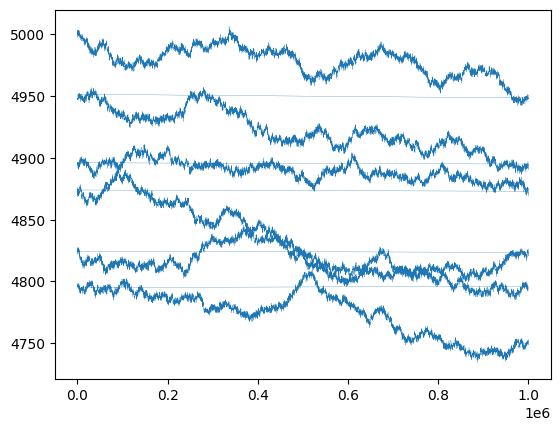

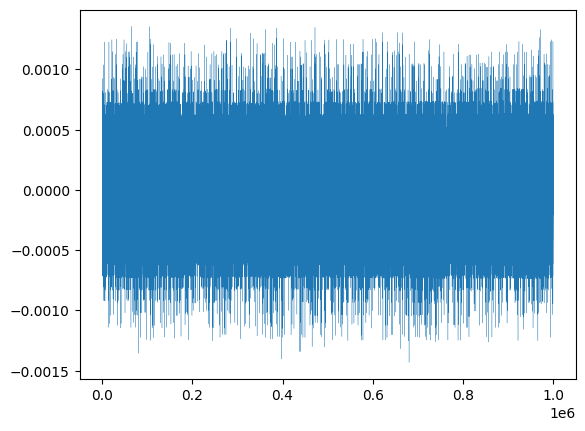

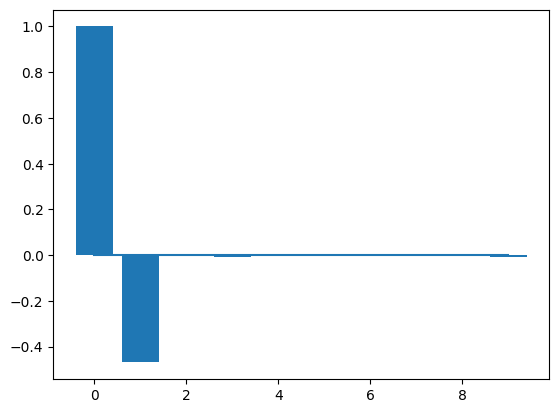

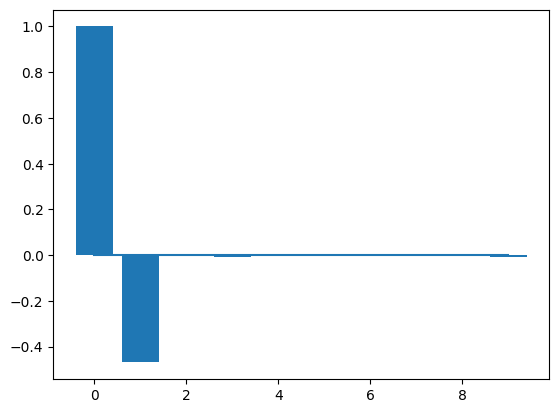

In [26]:
past_data = df1[df1['product'] == 'BANANAS']
past_data['total_time'] = (past_data['day'] + 2)* 999901 + past_data['timestamp']
past_data['returns'] = past_data['mid_price'] /past_data['mid_price'].shift() - 1

plt.plot(
    past_data['timestamp'],
    past_data['mid_price'],
    lw=0.2
)
plt.show()

plt.plot(
    past_data['timestamp'],
    past_data['returns'],
    lw=0.2
)
plt.show()

x = []
y = []

for i in range(10):
    x.append(i)
    y.append(past_data['returns'].autocorr(lag=i))

plt.bar(x, y)
plt.plot([x[0], x[-1]],
        [0,0])

plt.show()


x = []
y = []

for i in range(10):
    x.append(i)
    y.append(past_data['returns'].autocorr(lag=i))

plt.bar(x, y)
plt.plot([x[0], x[-1]],
        [0,0])

plt.show()